In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [2]:
file_path = '/kaggle/input/bankchurners/BankChurners.csv'

In [3]:
temp_df = pd.read_csv(file_path)
temp_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Minimum Age: 26
Maximum Age: 73


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


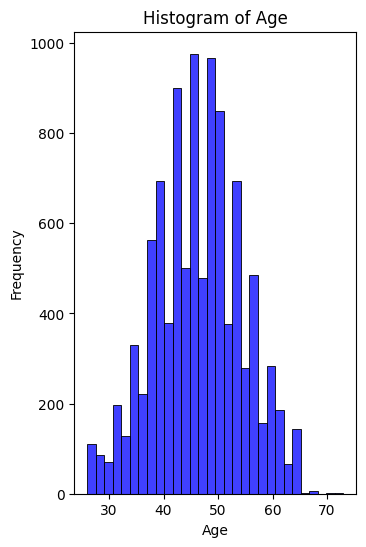

In [4]:
#AGE
print("Minimum Age:",temp_df['Customer_Age'].min())
print("Maximum Age:",temp_df['Customer_Age'].max())

plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
sns.histplot(temp_df['Customer_Age'], bins=30, kde=False, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Overall Gender Distribution')

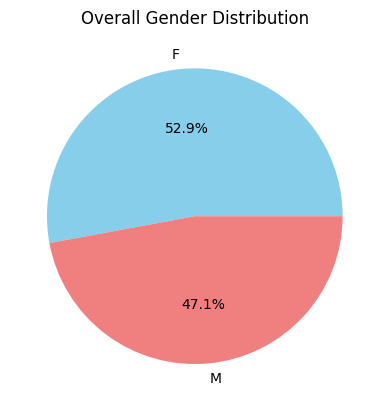

In [5]:
#Gender
gender_counts = temp_df['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Overall Gender Distribution')

Text(0.5, 1.0, 'Attrited Customers by Gender')

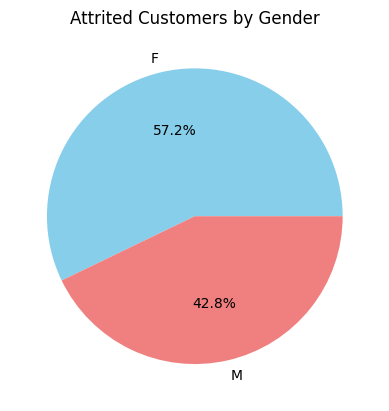

In [6]:
#Churn Rate:
churn_count = temp_df[temp_df['Attrition_Flag'] == 'Attrited Customer']['Gender'].value_counts()
plt.pie(churn_count, labels = churn_count.index, autopct = '%1.1f%%', colors = ['skyblue', 'lightcoral'])
plt.title("Attrited Customers by Gender")

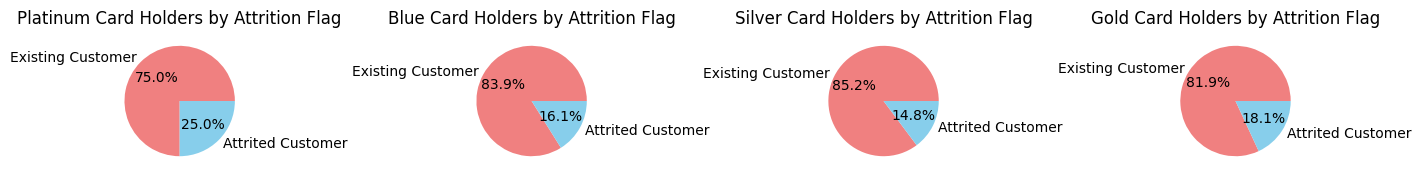

In [7]:
platinum_counts = temp_df[temp_df['Card_Category'] == 'Platinum']['Attrition_Flag'].value_counts()

blue_counts = temp_df[temp_df['Card_Category'] == 'Blue']['Attrition_Flag'].value_counts()

silver_counts = temp_df[temp_df['Card_Category'] == 'Silver']['Attrition_Flag'].value_counts()

gold_counts = temp_df[temp_df['Card_Category'] == 'Gold']['Attrition_Flag'].value_counts()


plt.figure(figsize=(14, 5))


plt.subplot(1, 4, 1)
plt.pie(platinum_counts, labels=platinum_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Platinum Card Holders by Attrition Flag')


plt.subplot(1, 4, 2)
plt.pie(blue_counts, labels=blue_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Blue Card Holders by Attrition Flag')

plt.subplot(1, 4, 3)
plt.pie(silver_counts, labels = silver_counts.index, autopct = '%1.1f%%', colors = ['lightcoral', 'skyblue'])
plt.title("Silver Card Holders by Attrition Flag")

plt.subplot(1, 4, 4)
plt.pie(gold_counts, labels = gold_counts.index, autopct = '%1.1f%%', colors = ['lightcoral', 'skyblue'])
plt.title("Gold Card Holders by Attrition Flag")


plt.tight_layout()
plt.show()

In [8]:
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)

    df = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

    df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

    df = pd.get_dummies(df, drop_first=True)

    return df

In [9]:
def engineer_features(df):
    df['Credit_Utilization_Ratio'] = df['Total_Revolving_Bal'] / df['Credit_Limit']

    df['Avg_Transaction_Amount'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

    return df

def perform_eda(df):
    plt.figure(figsize=(20, 16))
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [10]:
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) #changes

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf_model = RandomForestClassifier(n_estimators=150, random_state=42) #changes
    rf_model.fit(X_train_scaled, y_train)

    return rf_model, X_test_scaled, y_test

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

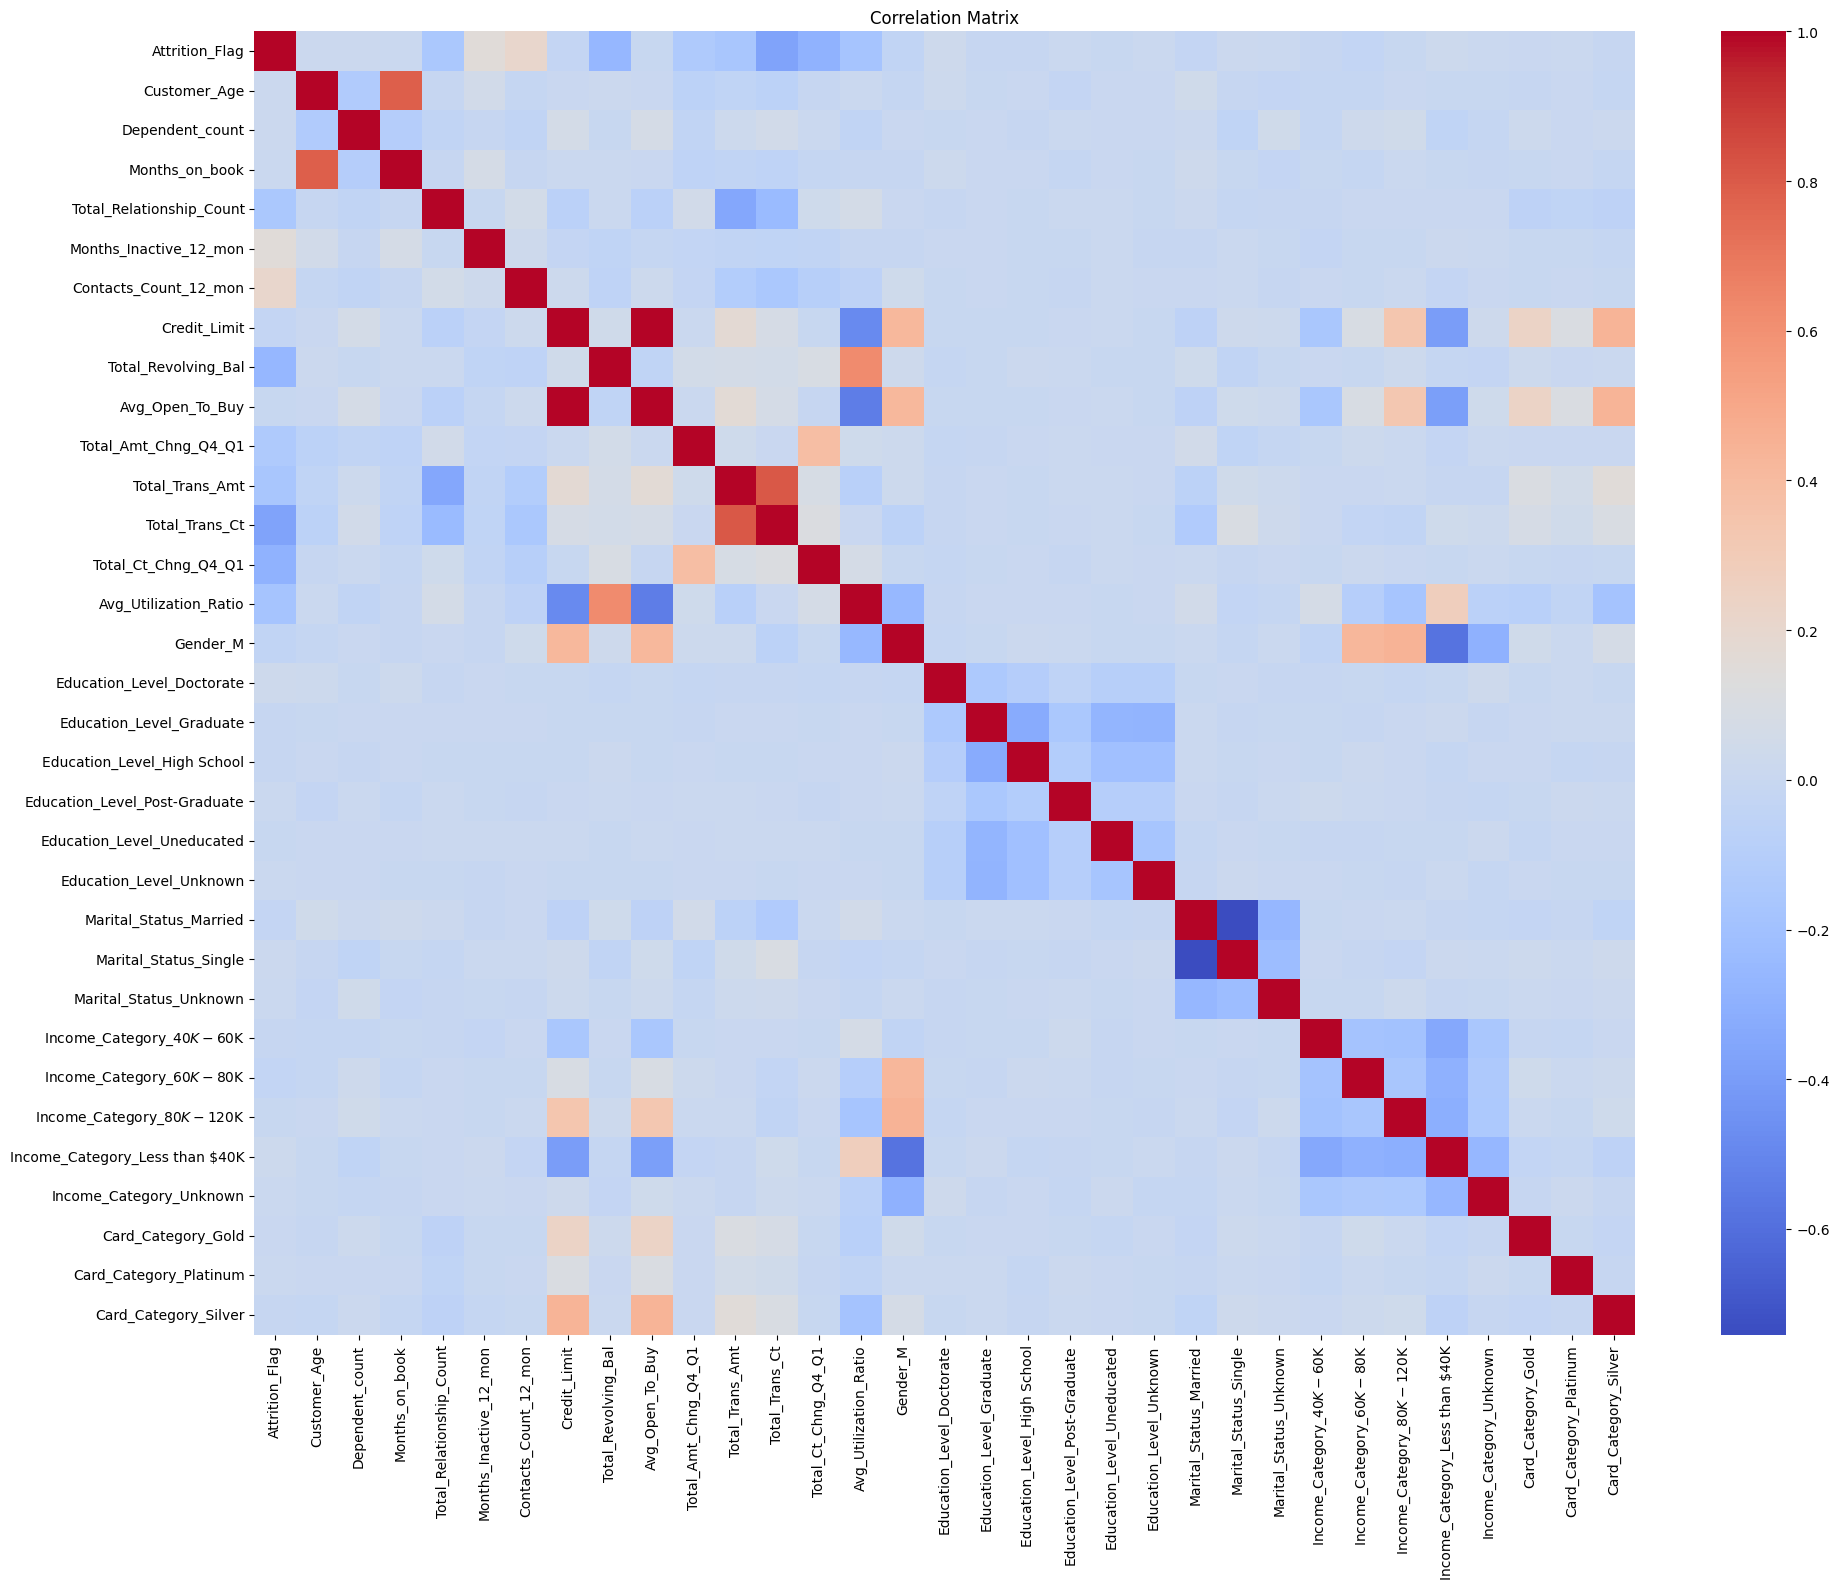

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1273
           1       0.93      0.82      0.87       247

    accuracy                           0.96      1520
   macro avg       0.95      0.91      0.93      1520
weighted avg       0.96      0.96      0.96      1520


Confusion Matrix:
[[1258   15]
 [  44  203]]


In [12]:
if __name__ == "__main__":
    file_path = '/kaggle/input/bankchurners/BankChurners.csv'

    df = load_and_preprocess_data(file_path)
    perform_eda(df)
    df = engineer_features(df)

    X = df.drop('Attrition_Flag', axis=1)
    y = df['Attrition_Flag']

    model, X_test, y_test = train_model(X, y)
    evaluate_model(model, X_test, y_test)

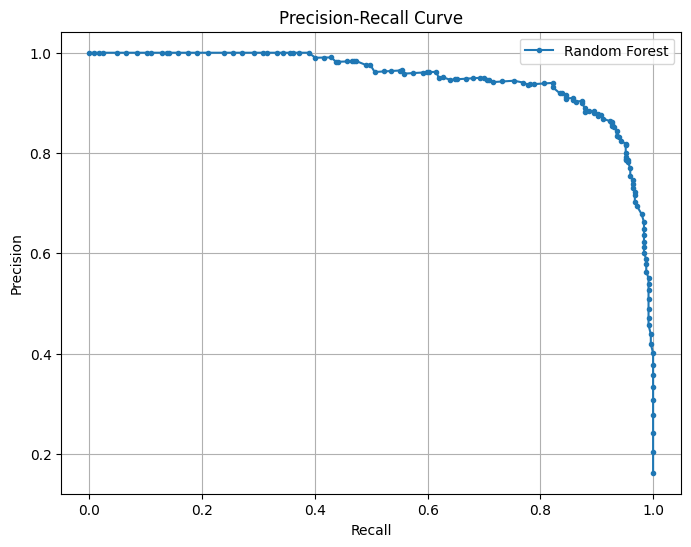

In [13]:
y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')  # 'binary' for binary classification
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy: 0.9612
F1 Score: 0.8731
Precision: 0.9312
Recall: 0.8219
Confusion Matrix: 
[[1258   15]
 [  44  203]]
